In [1]:
import pandas as pd 

In [3]:
df=pd.read_csv('data_science_job.csv') 

In [5]:
df.drop(columns=['enrollee_id'],inplace=True)

In [7]:
df["city"]=df["city"].apply(lambda x:x.lstrip('city_')) 

In [9]:
df['city']=df['city'].astype(int)

In [11]:
df['city'].dtype 

dtype('int32')

In [13]:
df=df.sort_values(by='city')

In [15]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
18720,1,0.847,Male,No relevent experience,Full time course,Graduate,STEM,5.0,100-500,Pvt Ltd,13.0,0.0
4669,1,0.847,Male,Has relevent experience,no_enrollment,Masters,STEM,10.0,50-99,Pvt Ltd,59.0,0.0
14300,1,0.847,Male,No relevent experience,Full time course,High School,NaN,4.0,10000+,Pvt Ltd,114.0,0.0
15172,1,0.847,Male,Has relevent experience,Full time course,Graduate,STEM,10.0,5000-9999,Pvt Ltd,9.0,0.0
5723,1,0.847,Male,No relevent experience,Full time course,Graduate,STEM,11.0,NaN,NaN,194.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12531,180,0.698,NaN,No relevent experience,no_enrollment,Graduate,STEM,2.0,NaN,NaN,13.0,0.0
12040,180,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,NaN,NaN,57.0,0.0
18477,180,0.698,NaN,No relevent experience,no_enrollment,Graduate,STEM,3.0,<10,Pvt Ltd,43.0,0.0
11444,180,0.698,NaN,No relevent experience,Full time course,Graduate,STEM,1.0,NaN,NaN,77.0,0.0


1.Handling Missing Values

In [18]:
df['city_development_index'] = df['city_development_index'].ffill()

In [20]:
df['gender'] = df['gender'].fillna('Other')

In [22]:
df['enrolled_university'] = df['enrolled_university'].fillna('no_enrollment')

In [24]:
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])

In [26]:
df['major_discipline'] = df['major_discipline'].fillna('Other')

In [28]:
df['experience'] = df['experience'].fillna(df['experience'].median())

In [30]:
df['company_size'] = df['company_size'].fillna(df['company_size'].mode()[0])

In [32]:
df['company_type'] = df['company_type'].fillna(df['company_type'].mode()[0])

In [34]:
df['training_hours'] = df['training_hours'].fillna(df['training_hours'].median())

In [36]:
df.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
training_hours            0
target                    0
dtype: int64

2.Removing Duplicate Values

In [39]:
df.duplicated().sum() 

229

In [41]:
df=df.drop_duplicates()  

In [43]:
df.duplicated().sum() 

0

3.Checking Data is normal or skew


 Checking Normality for: city_development_index


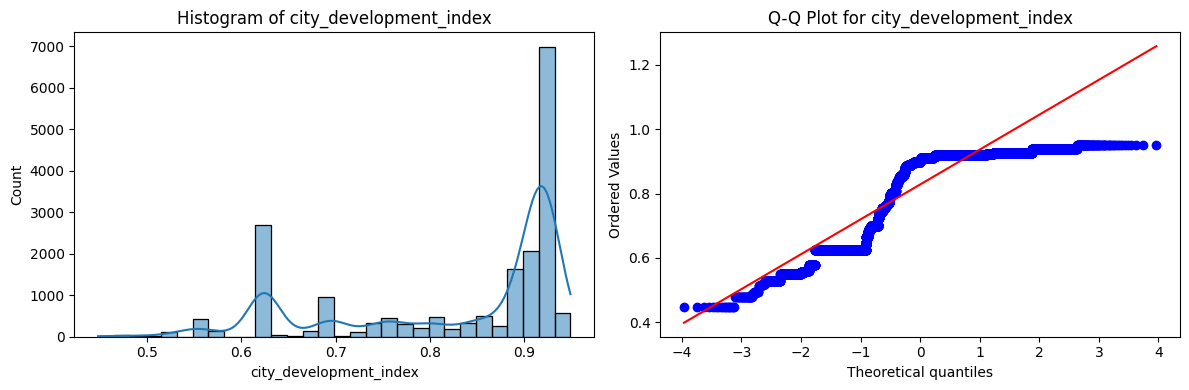

Skewness for city_development_index: -0.9838
 city_development_index is Left-Skewed (Negatively Skewed)


 Checking Normality for: training_hours


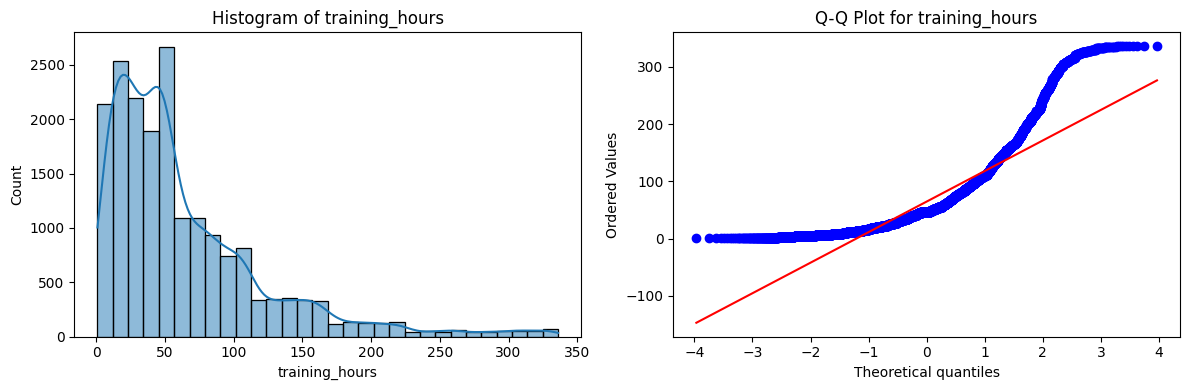

Skewness for training_hours: 1.8764
 training_hours is Right-Skewed (Positively Skewed)


 Checking Normality for: experience


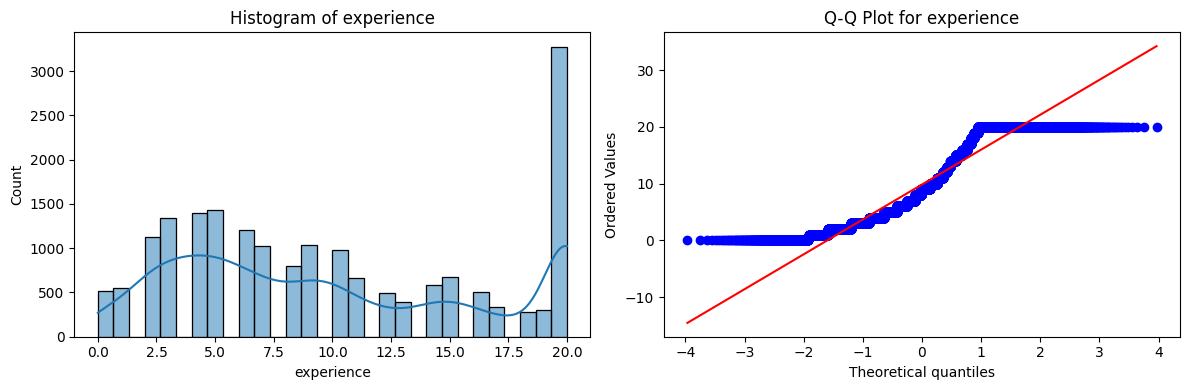

Skewness for experience: 0.3566
 experience is Normally Distributed



In [46]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


columns = ["city_development_index", "training_hours", "experience"]

for col in columns:
    print(f"\n Checking Normality for: {col}")
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram & KDE Plot 
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")

    # Q-Q Plot 
    stats.probplot(df[col], dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot for {col}")

    plt.tight_layout()  
    plt.show()

    
    skewness = df[col].skew()
    print(f"Skewness for {col}: {skewness:.4f}")

    if -0.5 <= skewness <= 0.5:
        print(f" {col} is Normally Distributed\n")
    elif skewness > 0.5:
        print(f" {col} is Right-Skewed (Positively Skewed)\n")
    else:
        print(f" {col} is Left-Skewed (Negatively Skewed)\n")


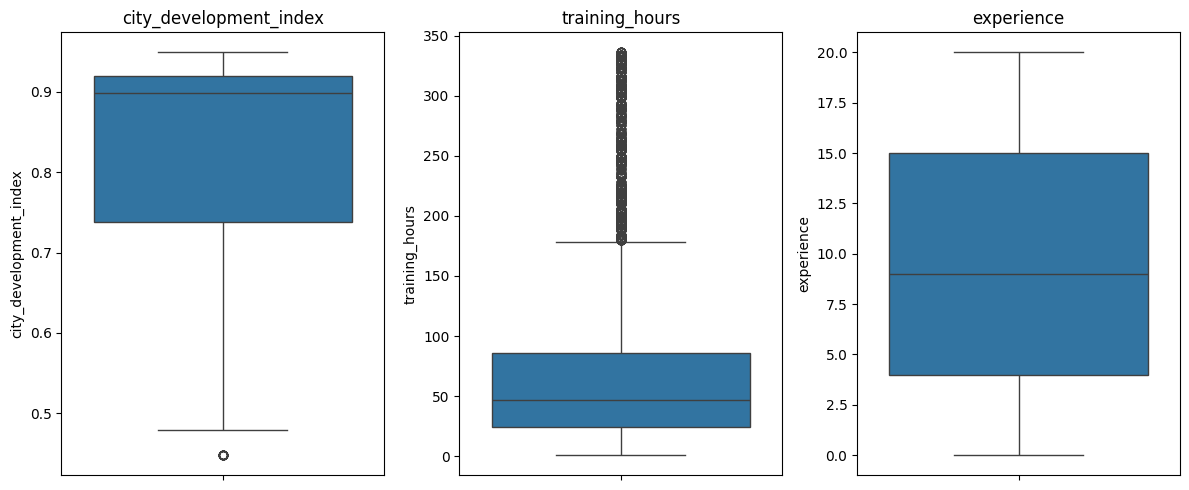

In [47]:
columns = ["city_development_index", "training_hours", "experience"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)  
    sns.boxplot(y=df[col])  
    plt.title(col) 

plt.tight_layout()  
plt.show()

In [50]:
from scipy import stats
df.loc[:, 'city_development_index'], _ = stats.boxcox(df['city_development_index'] + 1)
df.loc[:, 'training_hours'], _ = stats.boxcox(df['training_hours'] + 1)

In [52]:
print("New Skewness:", df['training_hours'].skew())
print("New Skewness:", df['city_development_index'].skew())

New Skewness: -0.01383156933283108
New Skewness: -0.5624343455490143


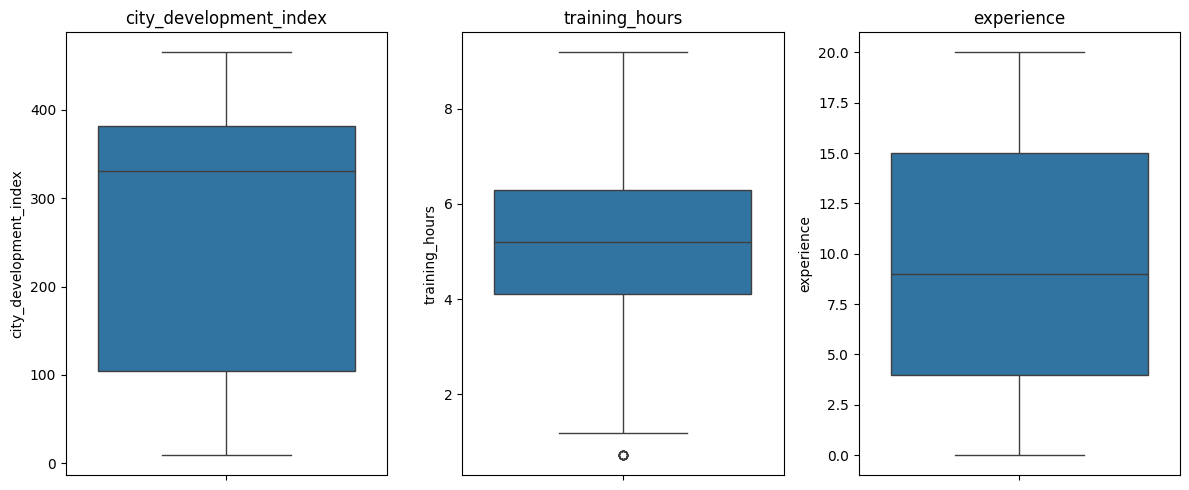

In [54]:
columns = ["city_development_index", "training_hours", "experience"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)  
    sns.boxplot(y=df[col])  
    plt.title(col) 

plt.tight_layout()  
plt.show()

In [56]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
18720,1,230.324141,Male,No relevent experience,Full time course,Graduate,STEM,5.0,100-500,Pvt Ltd,3.220857,0.0
4669,1,230.324141,Male,Has relevent experience,no_enrollment,Masters,STEM,10.0,50-99,Pvt Ltd,5.606765,0.0
14300,1,230.324141,Male,No relevent experience,Full time course,High School,Other,4.0,10000+,Pvt Ltd,6.849125,0.0
15172,1,230.324141,Male,Has relevent experience,Full time course,Graduate,STEM,10.0,5000-9999,Pvt Ltd,2.737839,0.0
5723,1,230.324141,Male,No relevent experience,Full time course,Graduate,STEM,11.0,50-99,Pvt Ltd,7.948169,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12531,180,76.777629,Other,No relevent experience,no_enrollment,Graduate,STEM,2.0,50-99,Pvt Ltd,3.220857,0.0
12040,180,76.777629,Male,Has relevent experience,no_enrollment,Graduate,STEM,3.0,50-99,Pvt Ltd,5.545211,0.0
18477,180,76.777629,Other,No relevent experience,no_enrollment,Graduate,STEM,3.0,<10,Pvt Ltd,5.054845,0.0
11444,180,76.777629,Other,No relevent experience,Full time course,Graduate,STEM,1.0,50-99,Pvt Ltd,6.093595,0.0


4.Handling Outliers

In [63]:
upperlimit = df['training_hours'].mean()+3*df['training_hours'].std()
lowerlimit = df['training_hours'].mean()-2.7*df['training_hours'].std() 

df=df.loc[(df['training_hours']<upperlimit) & (df['training_hours']>lowerlimit)] 

<Axes: ylabel='training_hours'>

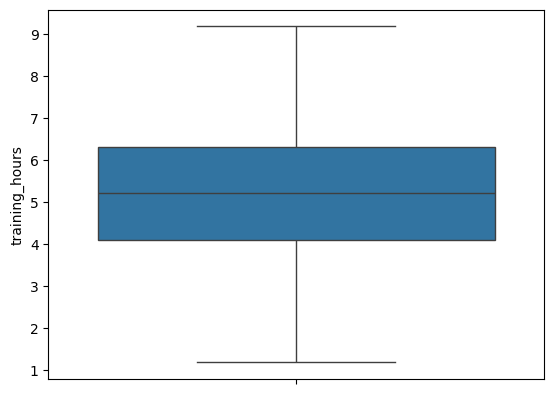

In [65]:
sns.boxplot(df['training_hours'])

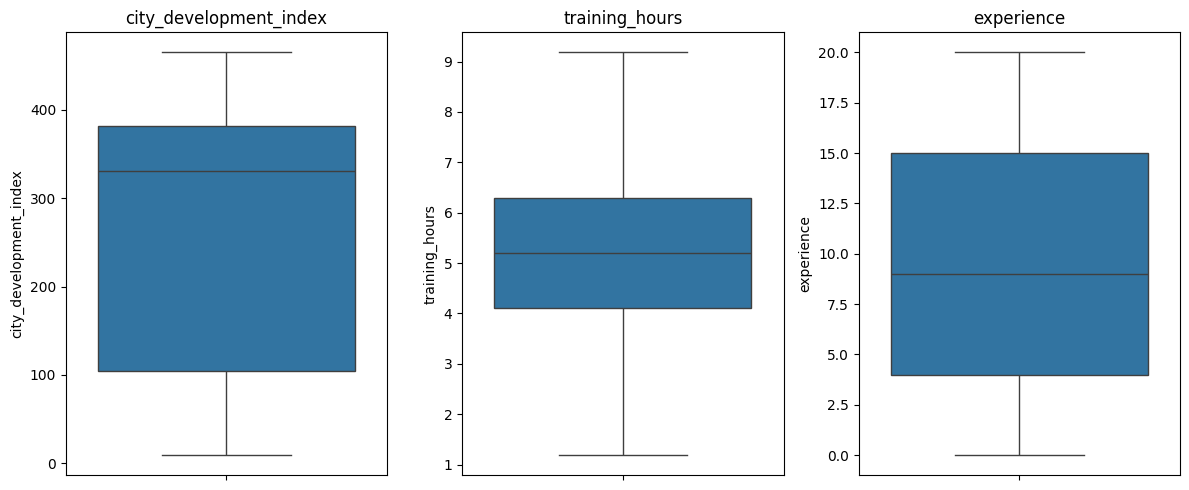

In [67]:
columns = ["city_development_index", "training_hours", "experience"]

plt.figure(figsize=(12, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)  
    sns.boxplot(y=df[col])  
    plt.title(col) 

plt.tight_layout()  
plt.show()

5.Encoding Categorical Variables

In [70]:
df['gender']=df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

In [72]:
from sklearn.preprocessing import LabelEncoder 
label=LabelEncoder()
df['relevent_experience']=label.fit_transform(df['relevent_experience'])

In [74]:
df['enrolled_university']=df['enrolled_university'].map({'Full time course':0, 'no_enrollment':1, 'Part time course':2})

In [76]:
df['education_level']=label.fit_transform(df['education_level'])

In [78]:
df['major_discipline']=df['major_discipline'].map({'STEM':0, 'Other':1, 'No Major':2, 'Business Degree':3, 'Arts':4,'Humanities':5})

In [80]:
df['company_type']=df['company_type'].map({'Pvt Ltd':0, 'Other':1, 'Public Sector':2, 'Funded Startup':3,
       'Early Stage Startup':4, 'NGO':5})

In [82]:
df['company_size']=df['company_size'].map({'100-500':0, '50-99':1, '10000+':2, '5000-9999':3, '10/49':4, '<10':5,
       '500-999':6, '1000-4999':7})

In [84]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
18720,1,230.324141,0,1,0,0,0,5.0,0,0,3.220857,0.0
4669,1,230.324141,0,0,1,2,0,10.0,1,0,5.606765,0.0
14300,1,230.324141,0,1,0,1,1,4.0,2,0,6.849125,0.0
15172,1,230.324141,0,0,0,0,0,10.0,3,0,2.737839,0.0
5723,1,230.324141,0,1,0,0,0,11.0,1,0,7.948169,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12531,180,76.777629,2,1,1,0,0,2.0,1,0,3.220857,0.0
12040,180,76.777629,0,0,1,0,0,3.0,1,0,5.545211,0.0
18477,180,76.777629,2,1,1,0,0,3.0,5,0,5.054845,0.0
11444,180,76.777629,2,1,0,0,0,1.0,1,0,6.093595,0.0


In [86]:
df.to_csv("Cleaned_EDA.csv",index=False)